## Feature Selection Advanced House Price Prediction

The main aim of this project is to predict the house price based on various features which we will discuss as we go ahead

#### Dataset to downloaded from the below link
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [56]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## for feature slection

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [57]:
dataset=pd.read_csv('data/X_train.csv')

In [58]:
dataset.drop(columns='Id',axis=1,inplace=True)

In [59]:
X=dataset.drop(columns='SalePrice')
y=dataset['SalePrice']

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)



In [82]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
X_scaled=scaler.fit_transform(X_train,y_train)

array([[-0.86894959,  0.21703732,  0.63603069, ...,  0.58718447,
        -0.8128736 ,  0.29606343],
       [ 2.88261838, -0.98009836, -0.82305655, ..., -0.21402051,
         1.42636311,  0.29606343],
       [ 0.0689424 ,  1.24315362,  0.63603069, ...,  0.58718447,
        -0.8128736 ,  0.29606343],
       ...,
       [-0.86894959, -0.98009836, -0.82305655, ..., -1.01522549,
        -0.8128736 ,  0.29606343],
       [-0.1655306 ,  0.90111485,  0.63603069, ..., -1.01522549,
        -0.8128736 , -1.07306249],
       [ 1.47578039,  0.73009547,  0.63603069, ...,  0.58718447,
         1.42636311,  1.66518936]])

In [84]:
X_test_scaled=scaler.fit(X_test)

In [ ]:
X_scaled

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
import numpy as np

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Perform feature selection on training data
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0))
feature_sel_model.fit(X_train, y_train)

# Select features based on the training data
selected_feat = X_train.columns[(feature_sel_model.get_support())]

# Apply the selected features to both training and testing data
X_train = X_train[selected_feat]
X_test = X_test[selected_feat]

# Print stats
print('Total features in training set: {}'.format(X_train.shape[1]))
print('Selected features: {}'.format(len(selected_feat)))
print('Features with coefficients shrank to zero: {}'.format(
    np.sum(feature_sel_model.estimator_.coef_ == 0)))


Total features in training set: 18
Selected features: 18
Features with coefficients shrank to zero: 64


In [27]:
import seaborn as sns

<Axes: >

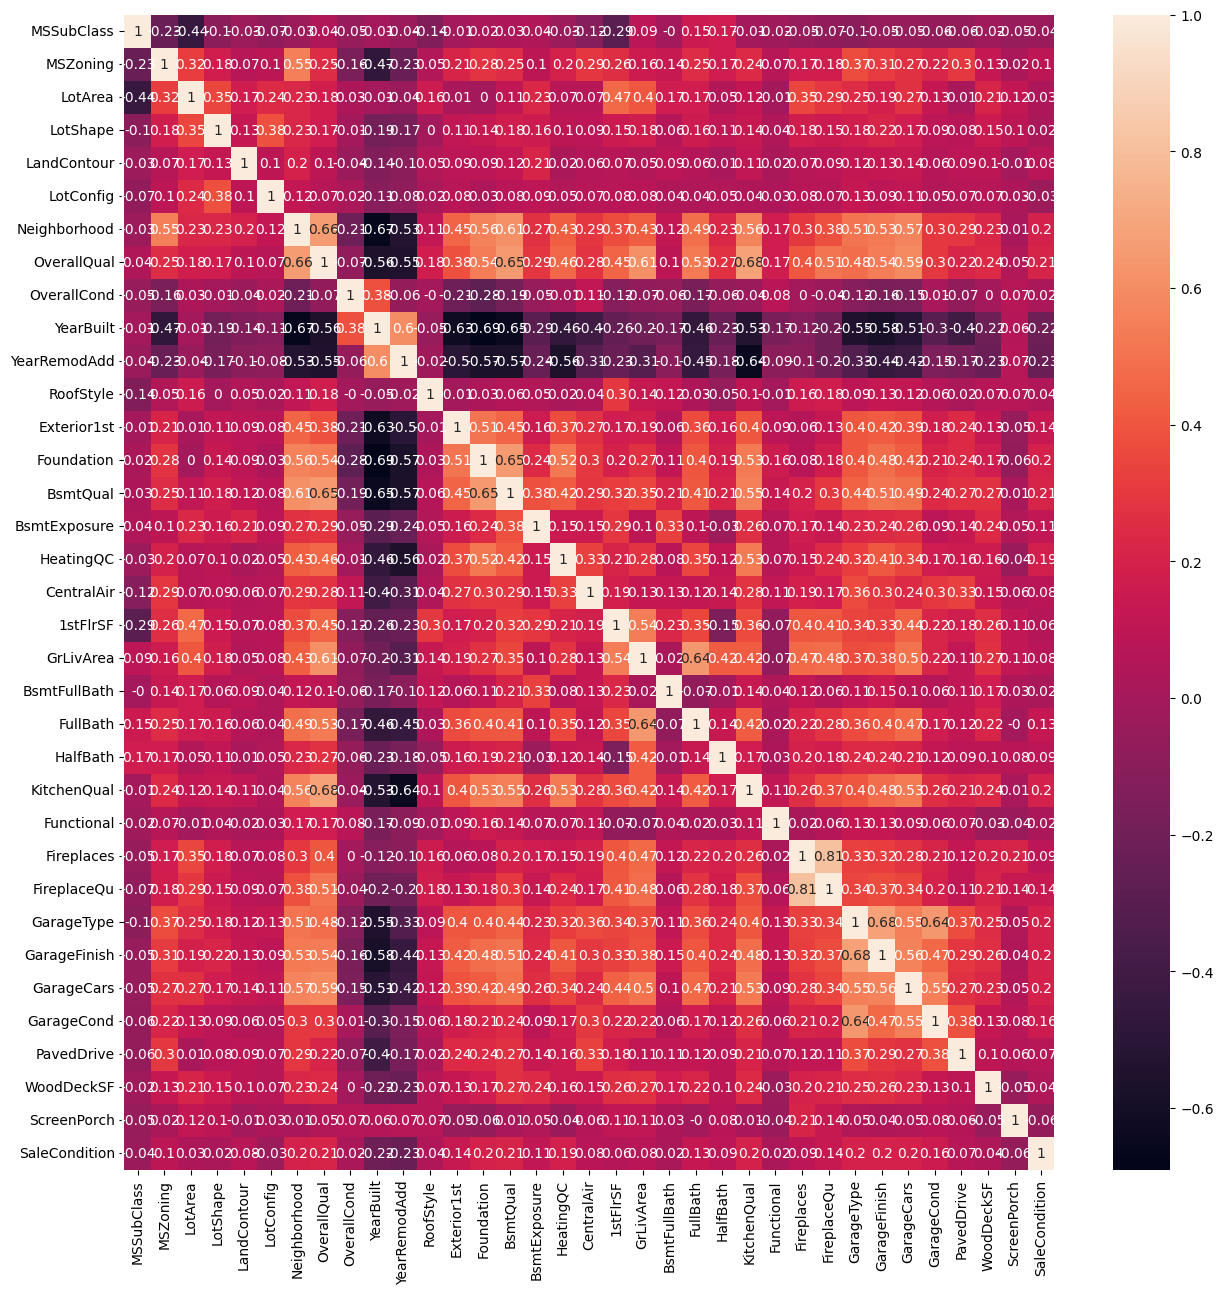

In [28]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train.corr().round(2),annot=True)

In [15]:
from sklearn.model_selection import GridSearchCV,KFold

In [18]:
lasso = Lasso(random_state=0)

# Define the grid of alpha values
param_grid = {'alpha': np.logspace(-4, 0, 50)}  # Alpha values from 0.0001 to 1.0

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Retrieve the best alpha value
best_alpha = grid_search.best_params_['alpha']
print("Best alpha value:", best_alpha)

Best alpha value: 0.00017575106248547912


In [19]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

kf = KFold(n_splits=5, shuffle=True, random_state=42)
alphas = np.logspace(-4, 0, 50)
best_alpha = None
best_score = float('inf')

# Iterate over alpha values
for alpha in alphas:
    lasso = Lasso(alpha=alpha, random_state=0)
    fold_scores = []
    
    for train_idx, val_idx in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
        
        lasso.fit(X_train_fold, y_train_fold)
        y_pred = lasso.predict(X_val_fold)
        mse = mean_squared_error(y_val_fold, y_pred)
        fold_scores.append(mse)
    
    avg_score = np.mean(fold_scores)
    if avg_score < best_score:
        best_score = avg_score
        best_alpha = alpha

print("Best alpha value:", best_alpha)


Best alpha value: 0.0002559547922699536


In [77]:
X_train.shape

(1022, 18)

In [78]:
X_test.shape

(438, 18)

In [79]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [80]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_square=r2_score(true,predicted)
    return mae,mse,rmse,r2_square

In [81]:
# Train Multiple Model
models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'ElasticNet':ElasticNet(),
    'DecisionTreeRegressor':DecisionTreeRegressor(),
    'RandomForestRegressor':RandomForestRegressor(),
    'AdaBoostRegressor':AdaBoostRegressor(),
    # 'xgboost':xgboost()

    
}
model_list=[]
r2_list=[]
trained_model_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)
    #Make Predictions
    y_pred=model.predict(X_test)

    mae,mse,rmse,r2_square=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])

    model_list.append(list(models.keys())[i])
    # trained_model_list.append(models.values()[i])

    print("Model Training Performace")
    print("RMSE:",rmse)
    print("MAE:",mae)
    print("R2 Score",r2_square*100)
    print("="*35)
    print("\n")

LinearRegression
Model Training Performace
RMSE: 0.14061473041612904
MAE: 0.10101038198263339
R2 Score 88.34485742090153


Lasso
Model Training Performace
RMSE: 0.4121973536243331
MAE: 0.3188396605629515
R2 Score -0.15355097541265295


Ridge
Model Training Performace
RMSE: 0.14127053362634567
MAE: 0.10110160323533314
R2 Score 88.23588869704115


ElasticNet
Model Training Performace
RMSE: 0.4121973536243331
MAE: 0.3188396605629515
R2 Score -0.15355097541265295


DecisionTreeRegressor
Model Training Performace
RMSE: 0.20116325624449083
MAE: 0.14701423082123807
R2 Score 76.1464365172273


RandomForestRegressor
Model Training Performace
RMSE: 0.13966784923356057
MAE: 0.09515302757431131
R2 Score 88.50129732656148


AdaBoostRegressor
Model Training Performace
RMSE: 0.1701219365891427
MAE: 0.13024051847327464
R2 Score 82.94009575170939


